In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #For EDA purpose
%matplotlib inline   
import seaborn as sns  #EDA purpose
import warnings  #bypass Warning
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler # To fit all data on same scale
from sklearn.model_selection import train_test_split # To split data in 2 parts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df = pd.read_csv('baseball.csv')

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.shape

(30, 17)

In [5]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [6]:
df.isnull()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
print(df.dtypes.value_counts())

print(df.dtypes) 

int64      16
float64     1
dtype: int64
W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object


In [8]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

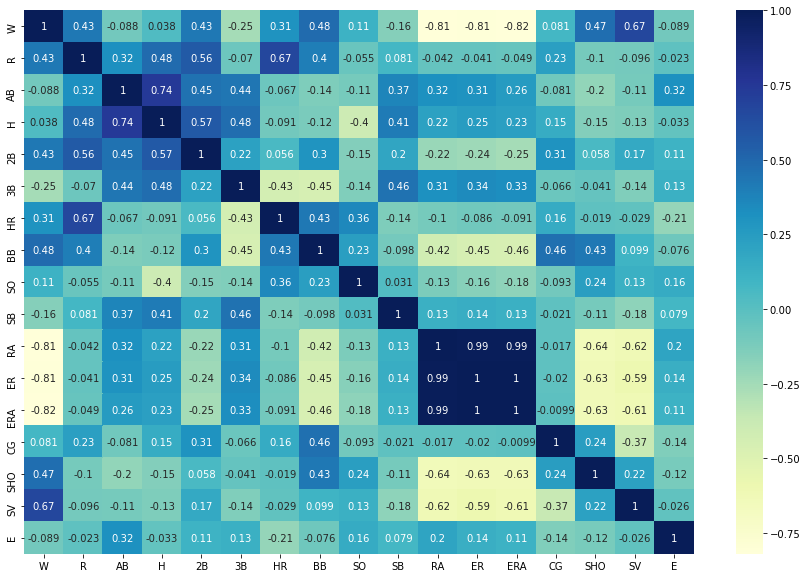

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True,cmap='YlGnBu')

Winning highly corelated with save(sv)

Winning have good corelation woth shoutout(sho)

Winning have good corelation with base on ball(BB)

Winning have good corelation with Run Scored(R)


ER(Earned run),ERA(Earned run average) and ERA+(Adjusted ERA+) all 3 are highly corelated with each other

Run have good corelation with base on Ball(BB)
Run have good corelation with Home Runs(hr)

At Bat(ab) have good corelation with Hit(H)

In [10]:
corr_matrix=df.corr()
corr_matrix['W']

W      1.000000
R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
ER    -0.809435
ERA   -0.819600
CG     0.080533
SHO    0.471805
SV     0.666530
E     -0.089485
Name: W, dtype: float64

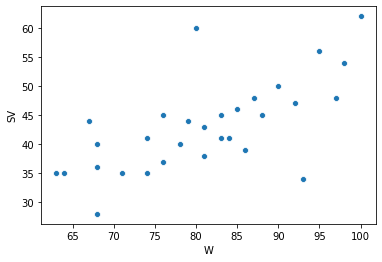

In [11]:
sns.scatterplot(x='W',y='SV',data=df)

<Figure size 144x72 with 0 Axes>

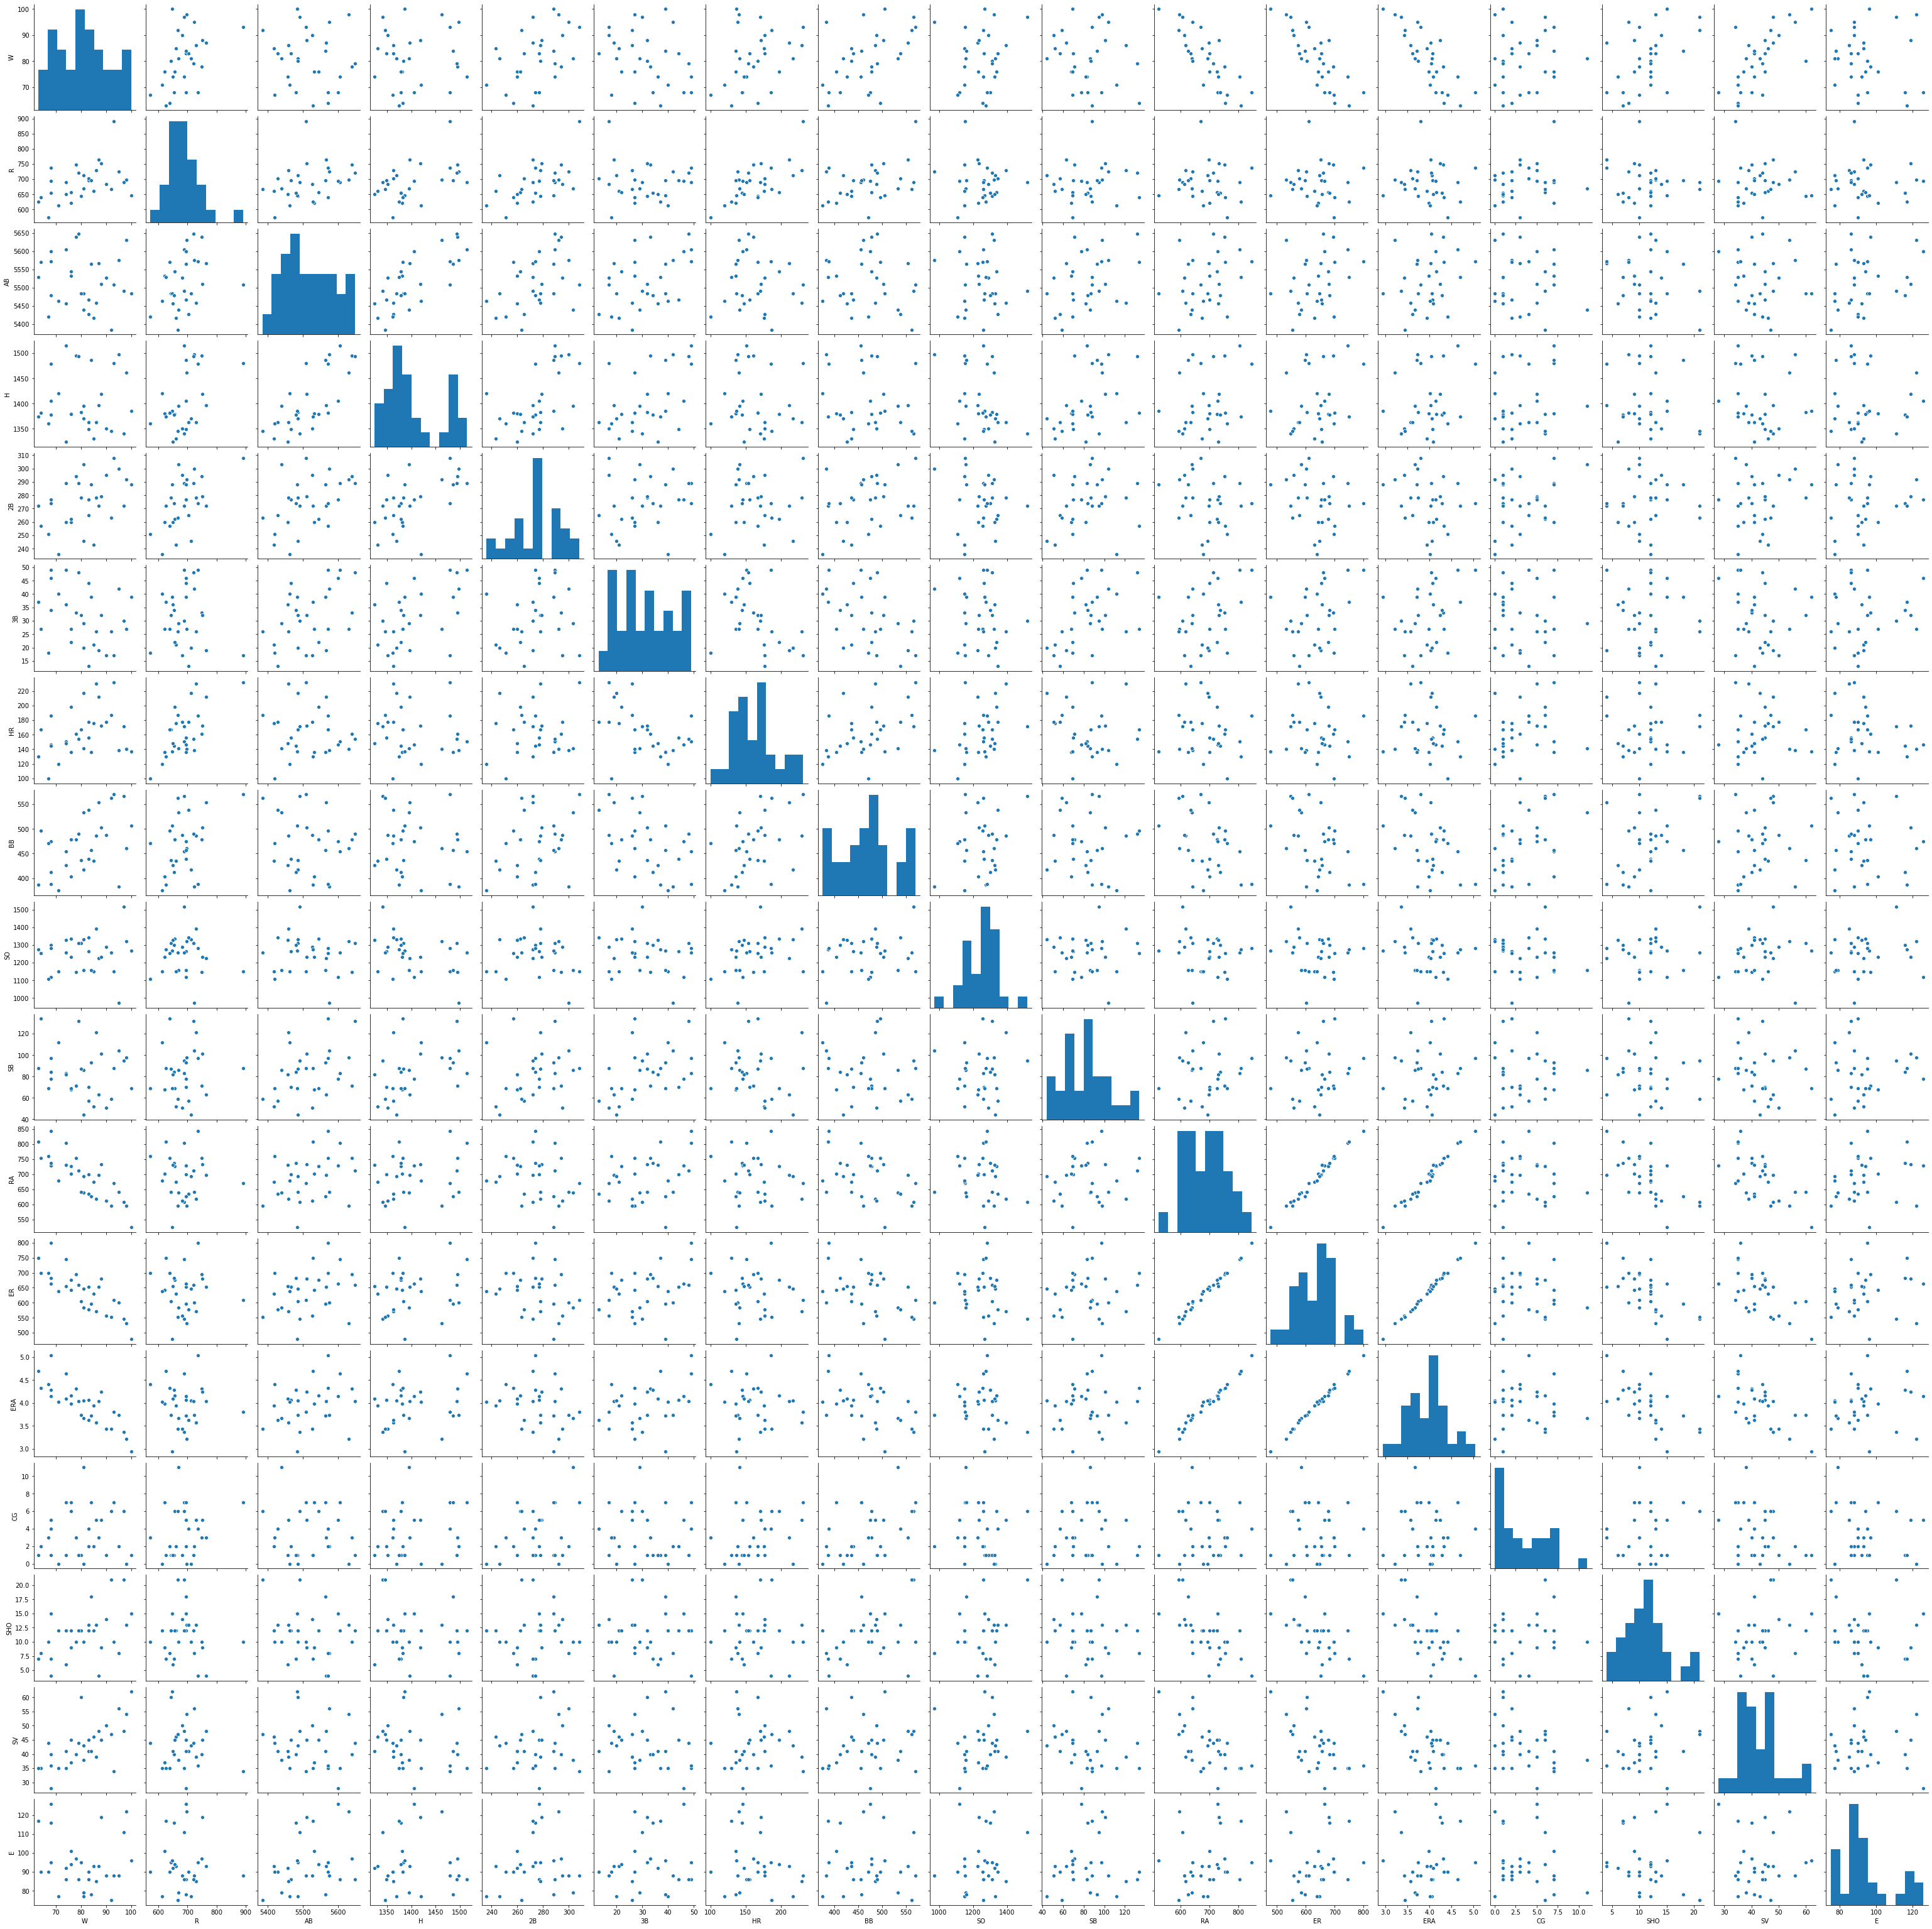

In [12]:
plt.figure(figsize=(2,1))
sns.pairplot(df)


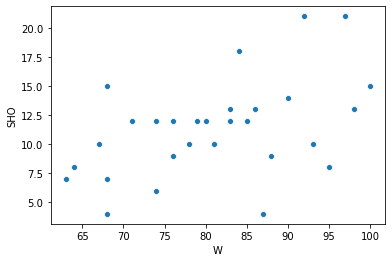

In [13]:
sns.scatterplot(x='W',y='SHO',data=df)

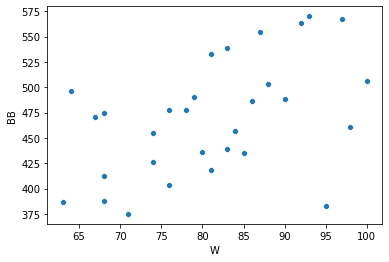

In [14]:
sns.scatterplot(x='W',y='BB',data=df)

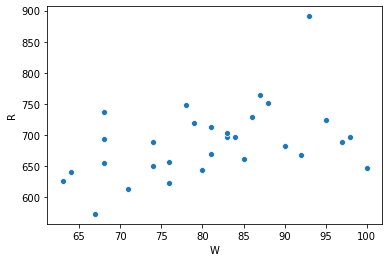

In [15]:
sns.scatterplot(x='W',y='R',data=df)

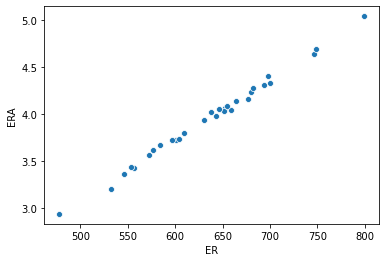

In [16]:
sns.scatterplot(x='ER',y='ERA',data=df)

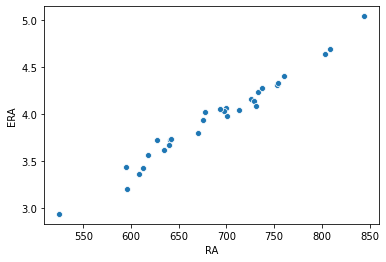

In [17]:
sns.scatterplot(x='RA',y='ERA',data=df)

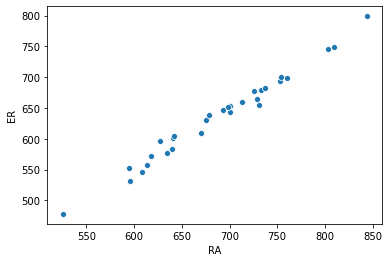

In [18]:
sns.scatterplot(x='RA',y='ER',data=df)

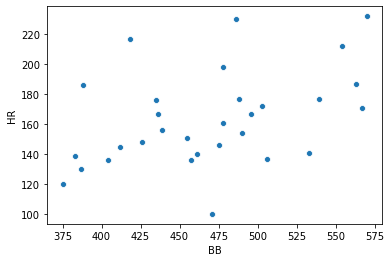

In [19]:
sns.scatterplot(x='BB',y='HR',data=df)

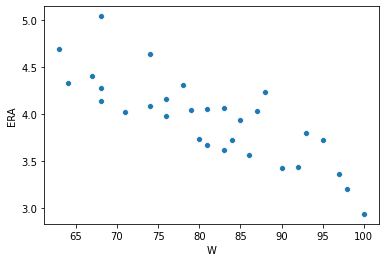

In [20]:
sns.scatterplot(x='W',y='ERA',data=df)

In [21]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

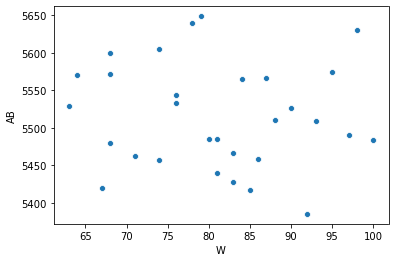

In [22]:
sns.scatterplot(x='W',y='AB',data=df)

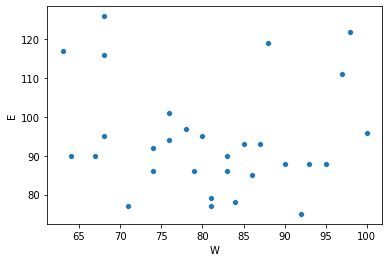

In [23]:
sns.scatterplot(x='W',y='E',data=df)

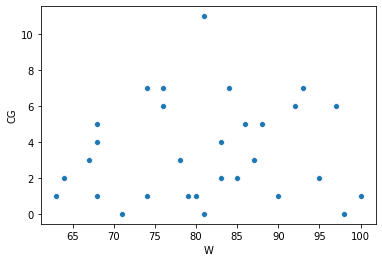

In [24]:
sns.scatterplot(x='W',y='CG',data=df)

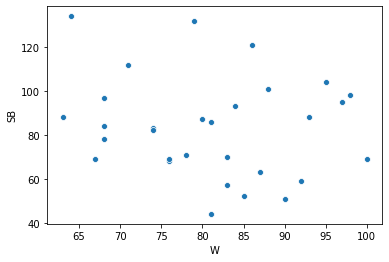

In [25]:
sns.scatterplot(x='W',y='SB',data=df)

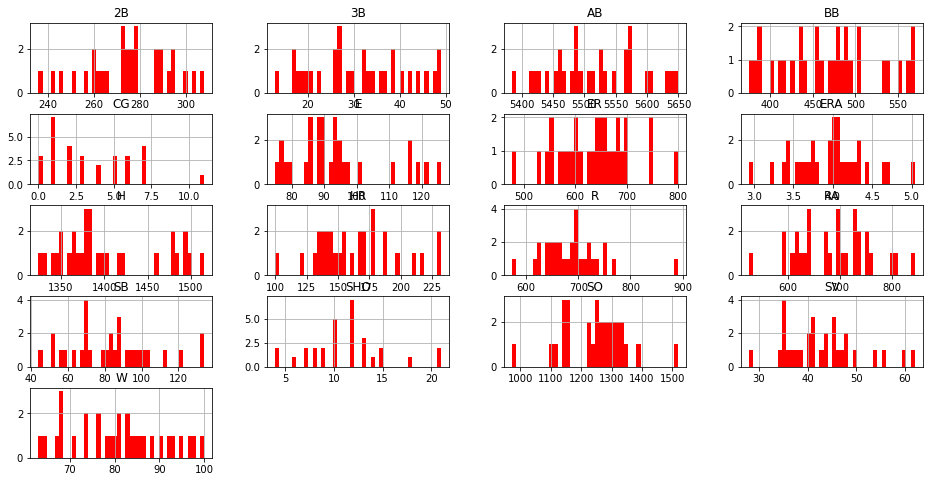

In [26]:
df.hist(figsize=(16,8),bins=40, color='red')
plt.show()

In [27]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

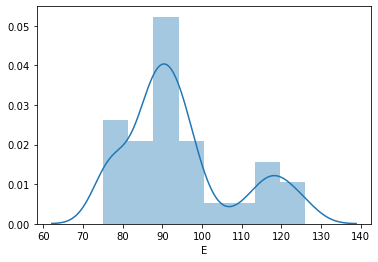

In [28]:
sns_plot = sns.distplot(df["E"])
#right skewed

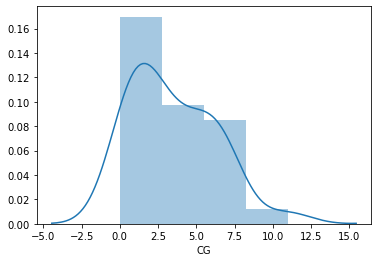

In [29]:
sns_plot = sns.distplot(df["CG"])
#right skewed

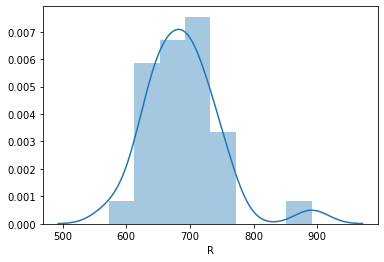

In [30]:
sns_plot = sns.distplot(df["R"])
#right skewed

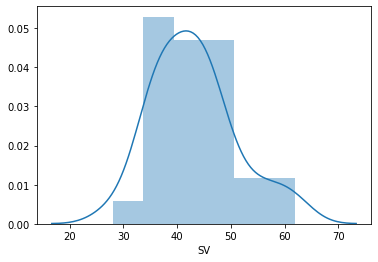

In [31]:
sns_plot = sns.distplot(df["SV"])
#right skewed

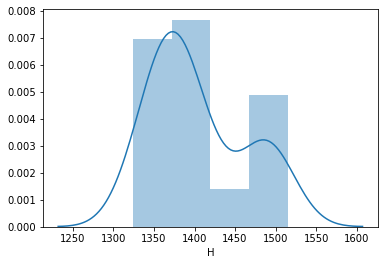

In [32]:
sns_plot = sns.distplot(df["H"])
#right skewed

In [33]:
df.drop(['CG','AB','E','SB'],inplace = True, axis =1)

In [34]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(df)
print(df.shape)
df_1=df.loc[(z_score<3).all(axis=1)]
print(df_1.shape)

(30, 13)
(29, 13)


In [35]:
from scipy.stats import boxcox
for col in df:
    if df_1[col].skew()>=.50:
        df_1[col]=np.cbrt(df[col]) ## For Right skewed data we use log,square root,cube root transformation      

In [36]:
df_1.skew()

W      0.119013
R     -0.215364
H      0.753696
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
RA     0.018155
ER     0.018461
ERA    0.016693
SHO   -0.298136
SV     0.280963
dtype: float64

In [37]:
df_1.shape

(29, 13)

In [38]:
df.head()

,W,R,H,2B,3B,HR,BB,SO,RA,ER,ERA,SHO,SV
0,95,724,1497,300,42,139,383,973,641,601,3.73,8,56
1,83,696,1349,277,44,156,439,1264,700,653,4.07,12,45
2,81,669,1395,303,29,141,533,1157,640,584,3.67,10,38
3,76,622,1381,260,27,136,404,1231,701,643,3.98,9,37
4,74,689,1515,289,49,151,455,1259,803,746,4.64,12,35


In [79]:
x =df.drop('W',axis=1)
y =df['W']

x_train,x_test,y_train,y_test=train_test_split(x,y)
x_train.head()

from sklearn.preprocessing import StandardScaler
STD=StandardScaler()
x=STD.fit_transform(x)

In [80]:
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('Train Score',ln.score(x_train,y_train)*100)

Train Score 96.23447059287685


In [81]:
print('Error')
print('Mean Absoluate Error',mean_absolute_error(y_test,pred))
print('Mean Squared Error',mean_squared_error(y_test,pred))
print('Room Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score',r2_score(y_test,pred)*100)

Error
Mean Absoluate Error 7.741837938722291
Mean Squared Error 77.71816239561622
Room Mean Squared Error 8.81579051450386
R2 Score 46.98963664798638


In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [83]:
dtc=DecisionTreeRegressor()
svr=SVR()
svrl=SVR(kernel='linear')
svrp=SVR(kernel='poly')
kn=KNeighborsRegressor(n_neighbors=5)

In [84]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Taining Score:-',f.score(x_train,y_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y_test,pred))
    print('Mean Squared Error',mean_squared_error(y_test,pred))
    print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred)*100)

In [85]:
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Taining Score:-',dtc.score(x_train,y_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,preddtc))
print('Mean Squared Error',mean_squared_error(y_test,preddtc))
print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,preddtc)))
print('R2 Score',r2_score(y_test,preddtc)*100)

Taining Score:- 100.0
Mean Absolute Error 8.25
Mean Squared Error 117.25
Root Mean Squared Erro 10.828203913853857
R2 Score 20.025578173292125


In [86]:
fun(svr)

Taining Score:- 1.6037032570599297
Mean Absolute Error 12.00771160622648
Mean Squared Error 169.55564140632015
Root Mean Squared Erro 13.021353286287878
R2 Score -15.651295427949364


In [87]:
fun(svrl)

Taining Score:- 89.2305638651785
Mean Absolute Error 4.174809145992214
Mean Squared Error 28.75539846848471
Root Mean Squared Erro 5.362406033534267
R2 Score 80.38638493037385


In [88]:
fun(svrp)

Taining Score:- 11.911670796297692
Mean Absolute Error 11.291526982635764
Mean Squared Error 151.690571317638
Root Mean Squared Erro 12.316272622739316
R2 Score -3.465805865169247


In [89]:
fun(kn)

Taining Score:- 60.49308201323438
Mean Absolute Error 8.550000000000002
Mean Squared Error 84.66000000000004
Root Mean Squared Erro 9.201086892318758
R2 Score 42.254715975700705


In [90]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor()
fun(rd)

Taining Score:- 91.38390866252256
Mean Absolute Error 6.52
Mean Squared Error 53.111750000000015
Root Mean Squared Erro 7.287780869373064
R2 Score 63.77329212405414


In [91]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
fun(ad)

Taining Score:- 98.91407068809744
Mean Absolute Error 6.542658730158733
Mean Squared Error 62.05556342907537
Root Mean Squared Erro 7.8775353651427915
R2 Score 57.67285452988571


In [92]:
paramad={'n_estimators':[50,100,150,10,125,250,500],'learning_rate':[1,10,100,50,150,250,500,0.01],'random_state':[0,10,50,100,108]}

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
gdad=GridSearchCV(ad,paramad)
gdad.fit(x,y)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [1, 10, 100, 50, 150, 250, 500, 0.01],
                         'n_estimators': [50, 100, 150, 10, 125, 250, 500],
                         'random_state': [0, 10, 50, 100, 108]})

In [95]:
print(gdad.best_score_)
print(gdad.best_params_)

-0.10749876231737816
{'learning_rate': 1, 'n_estimators': 50, 'random_state': 10}


In [96]:
ad1=AdaBoostRegressor(n_estimators=500,learning_rate=1,random_state=0)

In [97]:
fun(ad1)

Taining Score:- 99.16494052336529
Mean Absolute Error 6.831250000000001
Mean Squared Error 62.08267361111113
Root Mean Squared Erro 7.879255904659471
R2 Score 57.65436309164327


In [98]:
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
gd=GradientBoostingRegressor()

In [100]:
fun(gd)

Taining Score:- 99.99997566574862
Mean Absolute Error 6.406905874563716
Mean Squared Error 55.4659252371739
Root Mean Squared Erro 7.4475449134042755
R2 Score 62.1675453993485


In [101]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV

In [102]:
ls=Lasso()

In [103]:
param1={'normalize':['True','False'],'alpha':[1.0,0.1,0.001,0.0001,0.00001],'max_iter':[10,100,1000],'selection':['cyclic','random'],'copy_X':['True','False']}

In [104]:
gd=GridSearchCV(ls,param1)
gd.fit(x,y)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1.0, 0.1, 0.001, 0.0001, 1e-05],
                         'copy_X': ['True', 'False'],
                         'max_iter': [10, 100, 1000],
                         'normalize': ['True', 'False'],
                         'selection': ['cyclic', 'random']})

In [105]:
print(gd.best_score_)
print(gd.best_params_)

0.5456354199463009
{'alpha': 0.1, 'copy_X': 'False', 'max_iter': 100, 'normalize': 'True', 'selection': 'random'}


In [106]:
ls1=Lasso(alpha=0.001,copy_X=False,max_iter=100,normalize=True,selection='random')

In [107]:
rd=Ridge()

In [108]:
param2={'alpha':[10,1,0.1,0.01,0.001,0.0001],'normalize':['True','False'],'copy_X':['Ture','False'],'max_iter':[10,100,1000],'solver':['auto','svd','cholesky','isqr','sparse_cg','sag','saga']}

gd2=GridSearchCV(rd,param2)
gd2.fit(x,y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'copy_X': ['Ture', 'False'],
                         'max_iter': [10, 100, 1000],
                         'normalize': ['True', 'False'],
                         'solver': ['auto', 'svd', 'cholesky', 'isqr',
                                    'sparse_cg', 'sag', 'saga']})

In [109]:
rd1=Ridge(alpha=0.001,copy_X=False,max_iter=10,normalize=False,solver='sag')

In [110]:
es=ElasticNet()

In [111]:
param3={'alpha':[1,10,100,0.01,0.001,0.0001],'max_iter':[10,50,250,500,1000],'selection':['cyclic','random'],'normalize':['True','False']}

In [112]:
gd3=GridSearchCV(es,param3)
gd3.fit(x,y)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1, 10, 100, 0.01, 0.001, 0.0001],
                         'max_iter': [10, 50, 250, 500, 1000],
                         'normalize': ['True', 'False'],
                         'selection': ['cyclic', 'random']})

In [113]:
print(gd3.best_score_)
print(gd3.best_params_)

0.43293331174380256
{'alpha': 0.001, 'max_iter': 10, 'normalize': 'True', 'selection': 'random'}


In [114]:
es1=ElasticNet(alpha=0.0001,max_iter=500,normalize=True,selection='random')

In [115]:
fun(ls1)

Taining Score:- 94.42614188885257
Mean Absolute Error 5.770574783429582
Mean Squared Error 45.63516005304744
Root Mean Squared Erro 6.7553800820566305
R2 Score 68.87295914531562


In [116]:
fun(rd1)

Taining Score:- 83.54652167395322
Mean Absolute Error 5.784269871835967
Mean Squared Error 43.027686785199315
Root Mean Squared Erro 6.559549282168655
R2 Score 70.65147656130495


In [117]:
fun(es1)
predes=es1.predict(x_test)

Taining Score:- 95.35659499874988
Mean Absolute Error 6.0474838691835515
Mean Squared Error 53.30348829845751
Root Mean Squared Erro 7.300923797606541
R2 Score 63.64251037939592


In [118]:
from sklearn.model_selection import cross_val_score


In [119]:
for i in range(2,8):
    crs_score=cross_val_score(ln,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score -216.3580797155416
CV Value 3
Score -158.4679963948216
CV Value 4
Score 66.26931261178247
CV Value 5
Score 12.426456681354765
CV Value 6
Score 48.4082950298778
CV Value 7
Score 45.488138559521744


In [120]:
for i in range(2,8):
    crs_score=cross_val_score(svr,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score -3.96461920587074
CV Value 3
Score -4.313129632582439
CV Value 4
Score -6.972419846370667
CV Value 5
Score -32.69822798320437
CV Value 6
Score 0.7677845037395954
CV Value 7
Score -23.6835878993688


In [121]:
for i in range(2,8):
    crs_score=cross_val_score(dtc,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score -56.864727778893624
CV Value 3
Score -10.576791020036902
CV Value 4
Score -36.454986459868785
CV Value 5
Score -136.11746447726617
CV Value 6
Score -61.99821701850633
CV Value 7
Score -114.16316683517765


In [122]:
for i in range(2,11):
    crs_score=cross_val_score(kn,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score -17.774058068605154
CV Value 3
Score 34.76767292930309
CV Value 4
Score 38.85105546977736
CV Value 5
Score -24.875218840264456
CV Value 6
Score 24.50846998203903
CV Value 7
Score 5.715839024295493
CV Value 8
Score 20.23420738460256
CV Value 9
Score -1264.0677284943567
CV Value 10
Score -1168.0669236606745


In [123]:
for i in range(2,8):
    crs_score=cross_val_score(ls1,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score -28.04643350974746
CV Value 3
Score 44.162292396207796
CV Value 4
Score 69.3427333162567
CV Value 5
Score 35.329002236493956
CV Value 6
Score 57.73626277050305
CV Value 7
Score 51.65366850926103


In [124]:
for i in range(2,8):
    crs_score=cross_val_score(gd,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 0.07352477575982008
CV Value 3
Score 53.28992549240576
CV Value 4
Score 83.05618927272484
CV Value 5
Score 50.737467301633146
CV Value 6
Score 67.10686465913044
CV Value 7
Score 60.77229969220335


In [129]:
for i in range(2,8):
    crs_score=cross_val_score(rd,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 23.53033540421987
CV Value 3
Score 61.32991685549759
CV Value 4
Score 76.05947883618066
CV Value 5
Score 35.00092821936215
CV Value 6
Score 61.40179003085493
CV Value 7
Score 52.55914726771651


In [130]:
for i in range(2,8):
    crs_score=cross_val_score(rd1,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 25.39163350641743
CV Value 3
Score 65.50652936762428
CV Value 4
Score 74.9807068478669
CV Value 5
Score 29.517428395644707
CV Value 6
Score 58.62342584147402
CV Value 7
Score 44.966301685488105


In [127]:
for i in range(2,8):
    crs_score=cross_val_score(ad,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score -27.774872793488807
CV Value 3
Score 42.07476460571902
CV Value 4
Score 43.12732415914196
CV Value 5
Score -58.007420787636136
CV Value 6
Score 13.287810743597838
CV Value 7
Score 4.196186071443362


In [131]:
for i in range(2,8):
    crs_score=cross_val_score(es,x,y,cv=i)
    score=crs_score.mean()
    print('CV Value',i)
    print('Score',score*100)

CV Value 2
Score 33.04717180439479
CV Value 3
Score 66.20992674289647
CV Value 4
Score 71.49307273559788
CV Value 5
Score 38.64973195409977
CV Value 6
Score 59.5051070518371
CV Value 7
Score 48.91975090184739


In [128]:
df=pd.DataFrame()

In [132]:
df['Model Name']=['AD','RD','RD1','GD','LS','KNN','DTC','SVR','LN','ES']
df['RMSE']=[7.87,7.28,6.55,7.44,6.75,9.20,10.82,12.31,8.81,7.30]
df['R2_Score']=[57.67,63.77,70.65,62.16,68.67,42.00,20.02,-3.446,46.98,63]
df['CV Score']=[43.12,76.05,74.98,83.05,69.34,38.85,-56.05,-0.76,66.26,71.49]
df['Differance']=df['R2_Score']-df['CV Score']

In [133]:
df

,Model Name,RMSE,R2_Score,CV Score,Differance
0,AD,7.87,57.670,43.12,14.550
1,RD,7.28,63.770,76.05,-12.280
2,RD1,6.55,70.650,74.98,-4.330
3,GD,7.44,62.160,83.05,-20.890
4,LS,6.75,68.670,69.34,-0.670
5,KNN,9.20,42.000,38.85,3.150
6,DTC,10.82,20.020,-56.05,76.070
7,SVR,12.31,-3.446,-0.76,-2.686
8,LN,8.81,46.980,66.26,-19.280
9,ES,7.30,63.000,71.49,-8.490


Here , we will go with RandomForest1 model because of it's least diffence with R2 and CV score and Low RMSE 1

In [135]:
import pickle
filename='Baseball_winning.pkl'
pickle.dump(rd1,open(filename,'wb'))

    Actual  Predict
14      68     84.0
4       74     78.0
29      68     88.0
23      67     63.0
5       93     78.0
19      64     68.0
1       83     83.0
16      98     95.0


Text(0.5, 1.0, 'Regressor Line')

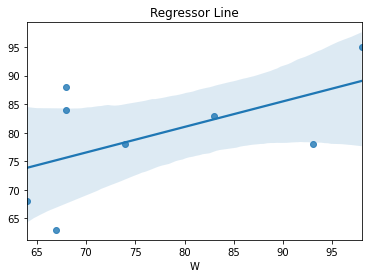

In [136]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=preddtc

res

print(res)
sns.regplot(y_test,preddtc)
plt.title('Regressor Line')